In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch
import numpy as np

In [2]:
from utils.events import read_actions


actions = read_actions()
actions

,event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,...,success,duel_type,goalkeeper_type,card_type,match_id,player_jersey_num,player_position_group_type,receiver_jersey_num,receiver_position_group_type,action_type
0,12926009,PASS,1,00:02:33.887000,None,alive,5,5,15620,0.503105,...,<NA>,<NA>,<NA>,<NA>,13335,17.0,LW,5.0,LCB,PASS
1,12926647,PASS,1,00:02:36.623000,None,alive,5,5,4696,0.329743,...,<NA>,<NA>,<NA>,<NA>,13335,5.0,LCB,28.0,RCB,PASS
2,12926642,DUEL,1,00:02:39.860000,None,alive,11,5,14278,0.760200,...,<NA>,AERIAL,<NA>,<NA>,13335,28.0,RCB,NaN,NaN,TACKLE
3,12926642,DUEL,1,00:02:39.860000,None,alive,11,11,284,0.760200,...,<NA>,AERIAL,<NA>,<NA>,13335,6.0,LCB,NaN,NaN,TACKLE
4,12926642,DUEL,1,00:02:39.860000,None,alive,11,5,13068,0.760200,...,<NA>,AERIAL,<NA>,<NA>,13335,30.0,RW,NaN,NaN,TACKLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591723,18703655,DUEL,2,01:47:10.097000,None,alive,218,218,567,0.298400,...,<NA>,AERIAL,<NA>,<NA>,20480,NaN,NaN,NaN,NaN,TACKLE
591724,18703656,PASS,2,01:47:10.130000,None,alive,218,218,567,0.296752,...,<NA>,<NA>,<NA>,<NA>,20480,NaN,NaN,NaN,NaN,PASS
591725,18703661,CARRY,2,01:47:13.100000,01:47:14.101000,alive,218,218,7252,0.280362,...,<NA>,<NA>,<NA>,<NA>,20480,NaN,NaN,NaN,NaN,DRIBBLE
591726,18703665,PASS,2,01:47:14.101000,None,alive,218,218,7252,0.305095,...,<NA>,<NA>,<NA>,<NA>,20480,NaN,NaN,NaN,NaN,PASS


In [98]:
gamestates = pd.read_parquet("./gamestates.parquet")

gamestates = gamestates[
    (gamestates['start_x'] >= 30) &
    (gamestates['start_x'] < 105/2) &
    (gamestates['start_y'] < 34) &
    (gamestates['start_y'] >= 20) &

    (gamestates['end_x'] >= 35) &
    (gamestates['end_x'] < 105/2) &
    (gamestates['end_y'] <= 10) &
    (gamestates['end_y'] > -20)
]

gamestates

,match_id,event_id,team_id,action_2,start_x_2,start_y_2,end_x_2,end_y_2,action_1,start_x_1,...,action,start_x,start_y,end_x,end_y,cross_success,attackers_in_box,defenders_in_box,attackers_in_zone,defenders_in_zone
0,13335,12926871,11,PASS,45.632,17.009,29.518,19.635,PASS,29.518,...,CROSS,43.205,27.236,46.140,-11.708,1,5.0,10.0,1.0,1.0
1,13335,12927878,11,PASS,11.829,23.639,18.517,28.793,PASS,27.271,...,CROSS,36.659,26.102,41.995,4.524,0,3.0,7.0,0.0,2.0
2,13335,12927949,11,CLEARANCE,41.995,4.524,41.995,4.524,PASS,28.903,...,CROSS,40.355,20.863,47.882,-7.707,1,3.0,10.0,1.0,0.0
13,13336,12928864,2,PASS,15.408,-1.277,26.596,12.278,PASS,26.772,...,CROSS,41.005,21.388,47.707,-7.719,1,4.0,8.0,1.0,2.0
25,13337,12929059,19,PASS,27.726,27.998,23.205,23.209,PASS,23.205,...,CROSS,36.868,21.410,45.218,2.658,0,3.0,5.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,20480,18694106,1,TAKE_ON,-12.158,0.557,-12.158,0.557,PASS,4.826,...,CROSS,33.537,26.171,41.424,5.987,0,NaN,NaN,NaN,NaN
9987,20480,18695804,1,PASS,40.612,25.782,27.850,23.666,TAKE_ON,29.707,...,CROSS,43.071,24.153,45.677,8.841,0,NaN,NaN,NaN,NaN
9988,20480,18696295,1,TAKE_ON,-2.372,31.494,-2.372,31.494,PASS,24.649,...,CROSS,49.693,28.960,42.456,-3.237,1,NaN,NaN,NaN,NaN
9990,20480,18700427,1,PASS,31.922,17.585,37.174,11.438,PASS,38.226,...,CROSS,38.686,25.711,48.942,-8.328,0,NaN,NaN,NaN,NaN


In [56]:
from tracking.read import read_by_match_id

match_id = 13359

tracking_df = read_by_match_id(match_id)

In [57]:
from tracking.process import _calculate_smoothed_velocity, _standardize_crossings_direction

tracking_df = _calculate_smoothed_velocity(tracking_df)

tracking_df.head()

,match_id,period,period_game_clock,frame_num,game_event_id,possession_event_id,element,jersey_number,x,y,team_id,vx,vy
0,13359.0,1.0,0.000788,4649.0,13451376.0,13440479.0,home,1.0,-39.155,-0.807,5.0,0.408333,0.05
1,NaN,1.0,0.034155,4650.0,NaN,NaN,home,1.0,-39.139,-0.805,5.0,0.412500,0.05
2,NaN,1.0,0.067522,4651.0,NaN,NaN,home,1.0,-39.122,-0.803,5.0,0.410000,0.05
3,NaN,1.0,0.100889,4652.0,NaN,NaN,home,1.0,-39.106,-0.801,5.0,0.408333,0.05
4,NaN,1.0,0.134255,4653.0,NaN,NaN,home,1.0,-39.089,-0.799,5.0,0.407143,0.05


In [58]:
gamestates[gamestates["match_id"] == match_id]

,match_id,event_id,team_id,action_2,start_x_2,start_y_2,end_x_2,end_y_2,action_1,start_x_1,...,action,start_x,start_y,end_x,end_y,cross_success,attackers_in_box,defenders_in_box,attackers_in_zone,defenders_in_zone
633,13359,13447236,5,PASS,3.747,3.905,9.840,18.382,PASS,16.666,...,CROSS,43.417,26.060,44.092,5.044,1,3.0,6.0,0.0,1.0
640,13359,13484044,5,CLEARANCE,47.585,14.083,47.585,14.083,PASS,-25.000,...,CROSS,39.675,30.007,43.164,-22.574,0,2.0,5.0,0.0,0.0
642,13359,13487893,3,PASS,-4.685,26.601,3.598,22.833,PASS,6.468,...,CROSS,31.394,24.090,46.034,3.203,1,1.0,2.0,0.0,1.0
645,13359,13490604,5,PASS,5.517,1.918,12.266,15.793,PASS,19.764,...,CROSS,35.992,25.412,42.913,4.919,0,1.0,3.0,0.0,0.0
646,13359,13491907,3,CLEARANCE,38.506,1.136,38.506,1.136,PASS,31.711,...,CROSS,34.420,23.877,40.308,9.279,1,6.0,10.0,1.0,0.0
649,13359,13494755,5,DRIBBLE,22.108,18.736,21.145,20.666,PASS,21.145,...,CROSS,41.085,25.318,51.762,3.631,0,3.0,5.0,0.0,1.0


In [62]:
event_id = 13491907

frame = tracking_df[tracking_df["possession_event_id"] == event_id]
action = actions[actions["event_id"] == event_id]
action

# def standarlize_frame(df, action):
#     team_id = action["team_id"]

#     player_with_ball = frame[
#         (frame["x"] == player_jersey_num) &
#         (frame["team_id"] == team_id)
#     ].iloc[0]

#     if player_with_ball["x"] < 0:
#         df.loc["x"] = df.loc["x"] * -1
#         df.loc["vx"] = df.loc["vx"] * -1

#     if player_with_ball["y"] < 0:
#         df.loc["y"] = df.loc["y"] * -1
#         df.loc["vy"] = df.loc["vy"] * -1

frame = _standardize_crossings_direction(frame, action)
action = gamestates[gamestates["event_id"] == event_id]

A entropia geral na coordenada final (40.31, 9.28) é: 0.0351


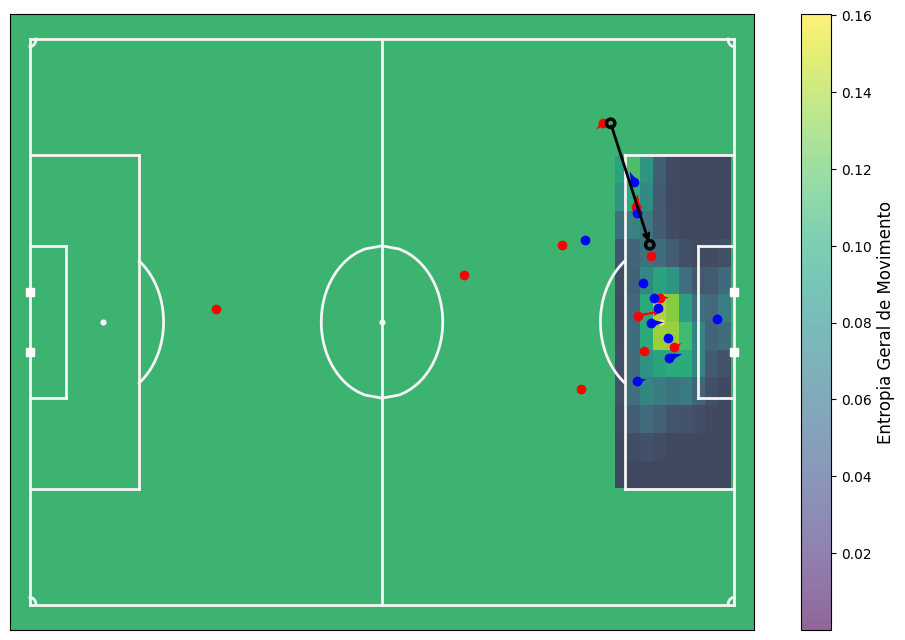

In [72]:
# pitch = Pitch(pitch_color="green", line_color="white")
# fig, ax = pitch.draw(figsize=(14, 8))

from matplotlib import cm
from matplotlib.colors import Normalize
from utils.plot import plot_pitch
from scipy.ndimage import gaussian_filter

fig, ax = plot_pitch()

# Cálculo da velocidade
frame["speed"] = np.hypot(frame["vx"], frame["vy"])
frame["x_future"] = frame["x"] + frame["vx"] * 1.0  # 1 segundo
frame["y_future"] = frame["y"] + frame["vy"] * 1.0

num_bins_x = 9
num_bins_y = 12

def calc_entropy_general(df_players):
    """
    Calcula a entropia geral de um conjunto de jogadores.
    """
    speed_hist, xedges, yedges = np.histogram2d(
        df_players["x_future"],
        df_players["y_future"],
        bins=[num_bins_x, num_bins_y],
        range=[[35, 105/2], [-20, 20]], # Ajuste o range conforme a área de interesse
        weights=df_players["speed"]
    )
    p = speed_hist / speed_hist.sum()
    # Evita log de zero, que resultaria em -inf
    p[p == 0] = 1e-10 # Substitui zeros por um valor muito pequeno
    entropy_matrix = -p * np.log2(p)
    entropy_smoothed = gaussian_filter(entropy_matrix, sigma=1.0)
    return entropy_smoothed, xedges, yedges

# Calcula a entropia geral para todos os jogadores no frame
entropy_general, xedges, yedges = calc_entropy_general(frame)

# Plotar o mapa de calor da entropia geral
heatmap_general = ax.pcolormesh(
    xedges,
    yedges,
    entropy_general.T,
    cmap=cm.viridis, # Ou outro cmap que goste para uma única escala, como 'hot', 'magma', 'plasma'
    shading='auto',
    alpha=0.6 # Ajuste a transparência se quiser ver mais o campo
)
cbar_general = fig.colorbar(heatmap_general, ax=ax)
cbar_general.set_label("Entropia Geral de Movimento", fontsize=12)

# Plotagem dos jogadores e da ação (mantido do seu código original)
team_id = action.iloc[0]["team_id"] # Para identificar a equipe atacante/defensora na plotagem de jogadores
attack_team = frame[frame["team_id"] == team_id]
defense_team = frame[frame["team_id"] != team_id]

ax.scatter(
    attack_team["x"],
    attack_team["y"],
    color="red"
)

ax.quiver(
    attack_team["x"],
    attack_team["y"],
    attack_team["vx"],
    attack_team["vy"],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="red",
    width=0.003
)

ax.scatter(
    defense_team["x"],
    defense_team["y"],
    color="blue"
)

ax.quiver(
    defense_team["x"],
    defense_team["y"],
    defense_team["vx"],
    defense_team["vy"],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="blue",
    width=0.003
)

start_x = action["start_x"].iloc[0]
start_y = action["start_y"].iloc[0]
end_x = action["end_x"].iloc[0]
end_y = action["end_y"].iloc[0]

ax.scatter(start_x, start_y, facecolors='none', edgecolors='black', linewidths=2.5)
ax.scatter(end_x, end_y, facecolors='none', edgecolors='black', linewidths=2.5)

ax.annotate(
    "",
    xy=(end_x, end_y),
    xytext=(start_x, start_y),
    arrowprops=dict(arrowstyle="->", color='black', linewidth=2)
)


def get_entropy_at_coordinates(x_coord, y_coord, entropy_matrix, xedges, yedges):
    """
    Retorna o valor de entropia da célula da grade que contém (x_coord, y_coord).
    
    Args:
        x_coord (float): Coordenada X do ponto.
        y_coord (float): Coordenada Y do ponto.
        entropy_matrix (np.array): A matriz de entropia (suavizada ou não).
        xedges (np.array): Array das bordas X dos bins.
        yedges (np.array): Array das bordas Y dos bins.
        
    Returns:
        float: O valor de entropia do bin, ou NaN se a coordenada estiver fora do range.
    """
    # Encontra o índice do bin para a coordenada X
    # np.digitize retorna o índice do bin ao qual cada valor de entrada pertence.
    # O valor é incluído no bin 'i' se xedges[i-1] <= x < xedges[i].
    # Para o último bin, ele inclui o limite superior.
    x_idx = np.digitize(x_coord, xedges) - 1 
    
    # Encontra o índice do bin para a coordenada Y
    y_idx = np.digitize(y_coord, yedges) - 1

    # Verifica se os índices estão dentro dos limites da matriz
    if 0 <= x_idx < entropy_matrix.shape[0] and 0 <= y_idx < entropy_matrix.shape[1]:
        # Retorna o valor de entropia do bin. Note o .T devido ao pcolormesh
        # que espera o array transposto. A matriz de entropia original não está transposta
        # mas pcolormesh a plota como se estivesse.
        # Portanto, para acessar o valor diretamente, use [x_idx, y_idx]
        return entropy_matrix[x_idx, y_idx]
    else:
        return np.nan # Retorna Not a Number se a coordenada estiver fora do range


entropy_at_end_coord = get_entropy_at_coordinates(end_x, end_y, entropy_general, xedges, yedges)
print(f"A entropia geral na coordenada final ({end_x:.2f}, {end_y:.2f}) é: {entropy_at_end_coord:.4f}")



A entropia geral na coordenada final (40.31, 9.28) é: 0.0308


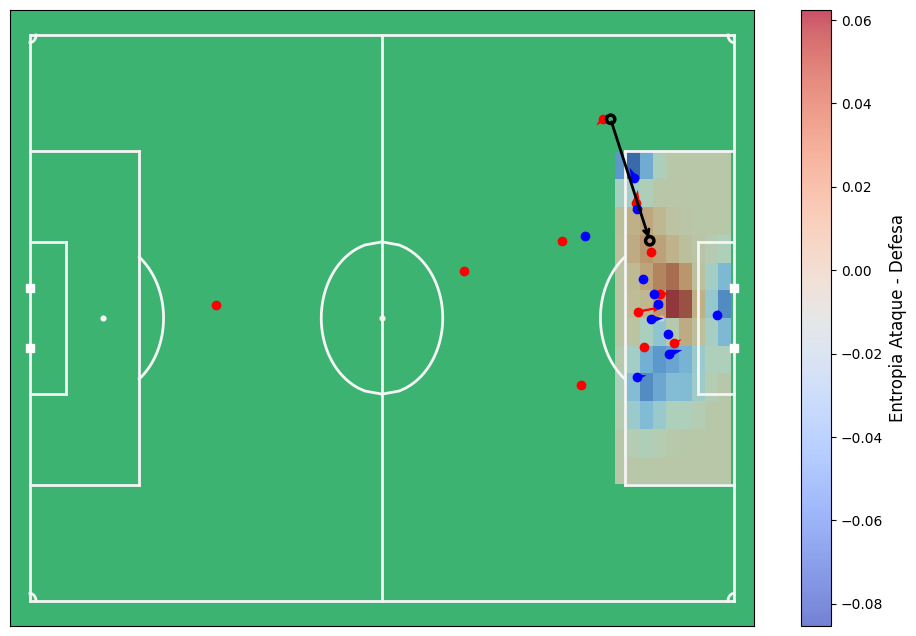

In [71]:

# pitch = Pitch(pitch_color="green", line_color="white")
# fig, ax = pitch.draw(figsize=(14, 8))

from matplotlib import cm
from matplotlib.colors import Normalize
from utils.plot import plot_pitch


fig, ax = plot_pitch()

team_id = action.iloc[0]["team_id"]

attack_team = frame[frame["team_id"] == team_id]
defense_team = frame[frame["team_id"] != team_id]

num_bins_x = 9
num_bins_y = 12

# Cálculo da velocidade
frame["speed"] = np.hypot(frame["vx"], frame["vy"])
frame["x_future"] = frame["x"] + frame["vx"] * 1.0  # 1 segundo
frame["y_future"] = frame["y"] + frame["vy"] * 1.0

def calc_entropy_team(df_team):
    speed_hist, xedges, yedges = np.histogram2d(
        df_team["x_future"],
        df_team["y_future"],
        bins=[num_bins_x, num_bins_y],
        range=[[35, 105/2], [-20, 20]],
        weights=df_team["speed"]
    )
    p = speed_hist / speed_hist.sum()
    entropy_matrix = np.zeros_like(p)
    mask = p > 0
    entropy_matrix[mask] = -p[mask] * np.log2(p[mask])
    entropy_smoothed = gaussian_filter(entropy_matrix, sigma=1.0)
    return entropy_smoothed, xedges, yedges

entropy_attack, xedges, yedges = calc_entropy_team(attack_team)
entropy_defense, _, _ = calc_entropy_team(defense_team)

# Diferença (ataque menos defesa)
entropy_diff = entropy_attack - entropy_defense

heatmap_diff = ax.pcolormesh(
    xedges,
    yedges,
    entropy_diff.T,
    cmap=cm.coolwarm,  # azul/vermelho para diferença positiva/negativa
    shading='auto',
    alpha=0.7
)
cbar_diff = fig.colorbar(heatmap_diff, ax=ax)
cbar_diff.set_label("Entropia Ataque - Defesa", fontsize=12)


ax.scatter(
    attack_team["x"],
    attack_team["y"],
    color="red"
)

ax.quiver(
    attack_team["x"],
    attack_team["y"],
    attack_team["vx"],
    attack_team["vy"],
    angles="xy",
    scale_units="xy",
    scale=1,        # ajuste o valor para escalar os vetores
    color="red",   # ou use uma lista para colorir por time
    width=0.003
)

ax.scatter(
    defense_team["x"],
    defense_team["y"],
    color="blue"
)

ax.quiver(
    defense_team["x"],
    defense_team["y"],
    defense_team["vx"],
    defense_team["vy"],
    angles="xy",
    scale_units="xy",
    scale=1,        # ajuste o valor para escalar os vetores
    color="blue",   # ou use uma lista para colorir por time
    width=0.003
)


start_x = action["start_x"].iloc[0]
start_y = action["start_y"].iloc[0]
end_x = action["end_x"].iloc[0]
end_y = action["end_y"].iloc[0]

ax.scatter(start_x, start_y, facecolors='none', edgecolors='black', linewidths=2.5)
ax.scatter(end_x, end_y, facecolors='none', edgecolors='black', linewidths=2.5)

ax.annotate(
    "",
    xy=(end_x, end_y),
    xytext=(start_x, start_y),
    arrowprops=dict(arrowstyle="->", color='black', linewidth=2)
)

def get_entropy_at_coordinates(x_coord, y_coord, entropy_matrix, xedges, yedges):
    """
    Retorna o valor de entropia da célula da grade que contém (x_coord, y_coord).
    
    Args:
        x_coord (float): Coordenada X do ponto.
        y_coord (float): Coordenada Y do ponto.
        entropy_matrix (np.array): A matriz de entropia (suavizada ou não).
        xedges (np.array): Array das bordas X dos bins.
        yedges (np.array): Array das bordas Y dos bins.
        
    Returns:
        float: O valor de entropia do bin, ou NaN se a coordenada estiver fora do range.
    """
    # Encontra o índice do bin para a coordenada X
    # np.digitize retorna o índice do bin ao qual cada valor de entrada pertence.
    # O valor é incluído no bin 'i' se xedges[i-1] <= x < xedges[i].
    # Para o último bin, ele inclui o limite superior.
    x_idx = np.digitize(x_coord, xedges) - 1 
    
    # Encontra o índice do bin para a coordenada Y
    y_idx = np.digitize(y_coord, yedges) - 1

    # Verifica se os índices estão dentro dos limites da matriz
    if 0 <= x_idx < entropy_matrix.shape[0] and 0 <= y_idx < entropy_matrix.shape[1]:
        # Retorna o valor de entropia do bin. Note o .T devido ao pcolormesh
        # que espera o array transposto. A matriz de entropia original não está transposta
        # mas pcolormesh a plota como se estivesse.
        # Portanto, para acessar o valor diretamente, use [x_idx, y_idx]
        return entropy_matrix[x_idx, y_idx]
    else:
        return np.nan # Retorna Not a Number se a coordenada estiver fora do range


entropy_at_end_coord = get_entropy_at_coordinates(end_x, end_y, entropy_diff, xedges, yedges)
print(f"A entropia geral na coordenada final ({end_x:.2f}, {end_y:.2f}) é: {entropy_at_end_coord:.4f}")


In [ ]:
num_bins_x = 9
num_bins_y = 12

# Cálculo da velocidade
frame["speed"] = np.hypot(frame["vx"], frame["vy"])
frame["x_future"] = frame["x"] + frame["vx"] * 1.0  # 1 segundo
frame["y_future"] = frame["y"] + frame["vy"] * 1.0

In [73]:
def calc_entropy_general(df_players):
    """
    Calcula a entropia geral de um conjunto de jogadores.
    """
    speed_hist, xedges, yedges = np.histogram2d(
        df_players["x_future"],
        df_players["y_future"],
        bins=[num_bins_x, num_bins_y],
        range=[[35, 105/2], [-20, 20]],
        weights=df_players["speed"]
    )
    p = speed_hist / speed_hist.sum()
    # Evita log de zero, que resultaria em -inf
    p[p == 0] = 1e-10 # Substitui zeros por um valor muito pequeno
    entropy_matrix = -p * np.log2(p)
    entropy_smoothed = gaussian_filter(entropy_matrix, sigma=1.0)
    return entropy_smoothed, xedges, yedges


In [93]:
def calc_entropy_diff(frame, action):
    team_id = action["team_id"]

    attack_team = frame[frame["team_id"] == team_id]
    defense_team = frame[frame["team_id"] != team_id]

    def calc_entropy_team(df_team):
        speed_hist, xedges, yedges = np.histogram2d(
            df_team["x_future"],
            df_team["y_future"],
            bins=[num_bins_x, num_bins_y],
            range=[[35, 105/2], [-20, 20]],
            weights=df_team["speed"]
        )
        p = speed_hist / speed_hist.sum()
        entropy_matrix = np.zeros_like(p)
        mask = p > 0
        entropy_matrix[mask] = -p[mask] * np.log2(p[mask])
        entropy_smoothed = gaussian_filter(entropy_matrix, sigma=1.0)
        return entropy_smoothed, xedges, yedges

    entropy_attack, xedges, yedges = calc_entropy_team(attack_team)
    entropy_defense, _, _ = calc_entropy_team(defense_team)

    # Diferença (ataque menos defesa)
    entropy_diff = entropy_attack - entropy_defense

    return entropy_diff, xedges, yedges

In [ ]:
def get_entropy_at_coordinates(x_coord, y_coord, entropy_matrix, xedges, yedges):
    """
    Retorna o valor de entropia da célula da grade que contém (x_coord, y_coord).
    
    Args:
        x_coord (float): Coordenada X do ponto.
        y_coord (float): Coordenada Y do ponto.
        entropy_matrix (np.array): A matriz de entropia (suavizada ou não).
        xedges (np.array): Array das bordas X dos bins.
        yedges (np.array): Array das bordas Y dos bins.
        
    Returns:
        float: O valor de entropia do bin, ou NaN se a coordenada estiver fora do range.
    """
    # Encontra o índice do bin para a coordenada X
    # np.digitize retorna o índice do bin ao qual cada valor de entrada pertence.
    # O valor é incluído no bin 'i' se xedges[i-1] <= x < xedges[i].
    # Para o último bin, ele inclui o limite superior.
    x_idx = np.digitize(x_coord, xedges) - 1 
    
    # Encontra o índice do bin para a coordenada Y
    y_idx = np.digitize(y_coord, yedges) - 1

    # Verifica se os índices estão dentro dos limites da matriz
    if 0 <= x_idx < entropy_matrix.shape[0] and 0 <= y_idx < entropy_matrix.shape[1]:
        # Retorna o valor de entropia do bin. Note o .T devido ao pcolormesh
        # que espera o array transposto. A matriz de entropia original não está transposta
        # mas pcolormesh a plota como se estivesse.
        # Portanto, para acessar o valor diretamente, use [x_idx, y_idx]
        return entropy_matrix[x_idx, y_idx]
    else:
        return np.nan # Retorna Not a Number se a coordenada estiver fora do range

In [100]:
from pathlib import Path
import re

from tqdm import tqdm


tracking_folder = Path("./data/")
parquet_pattern = re.compile(r'^\d{5}\.parquet$')

files = [f for f in tracking_folder.iterdir() if f.is_file() and parquet_pattern.match(f.name)]

matches = []
for file in files:
    pattern = re.match(r'^(\d{5})\.parquet$', file.name)
    if pattern:
        matches.append(int(pattern.group(1)))

print(f"Found {len(matches)} matches")


for match_id in tqdm(matches):
    tracking_df = read_by_match_id(match_id)
    tracking_df = _calculate_smoothed_velocity(tracking_df)
    for _, action in gamestates[gamestates["match_id"] == match_id].iterrows():
        event_id = action["event_id"]

        frame = tracking_df[tracking_df["possession_event_id"] == event_id]
        event = actions[actions["event_id"] == event_id]
        frame = _standardize_crossings_direction(frame, event)

        num_bins_x = 9
        num_bins_y = 12

        # Cálculo da velocidade
        frame["speed"] = np.hypot(frame["vx"], frame["vy"])
        frame["x_future"] = frame["x"] + frame["vx"] * 1.0  # 1 segundo
        frame["y_future"] = frame["y"] + frame["vy"] * 1.0

        entropy_general, xedges, yedges = calc_entropy_general(frame)
        value = get_entropy_at_coordinates(action["end_x"], action["end_y"], entropy_general, xedges, yedges)
        gamestates.loc[gamestates["event_id"] == action["event_id"], "entropy_general"] = value

        entropy_diff, xedges, yedges = calc_entropy_diff(frame, action)
        value = get_entropy_at_coordinates(action["end_x"], action["end_y"], entropy_diff, xedges, yedges)
        gamestates.loc[gamestates["event_id"] == action["event_id"], "entropy_diff"] = value

Found 274 matches


  1%|▏         | 4/274 [00:26<22:15,  4.95s/it]  /tmp/ipykernel_393995/3093085749.py:15: RuntimeWarning: invalid value encountered in divide
  p = speed_hist / speed_hist.sum()
/tmp/ipykernel_393995/822144585.py:12: RuntimeWarning: invalid value encountered in divide
  p = speed_hist / speed_hist.sum()
/tmp/ipykernel_393995/3093085749.py:15: RuntimeWarning: invalid value encountered in divide
  p = speed_hist / speed_hist.sum()
  2%|▏         | 6/274 [00:30<15:10,  3.40s/it]/tmp/ipykernel_393995/822144585.py:12: RuntimeWarning: invalid value encountered in divide
  p = speed_hist / speed_hist.sum()
/tmp/ipykernel_393995/3093085749.py:15: RuntimeWarning: invalid value encountered in divide
  p = speed_hist / speed_hist.sum()
  3%|▎         | 7/274 [00:32<13:13,  2.97s/it]/tmp/ipykernel_393995/822144585.py:12: RuntimeWarning: invalid value encountered in divide
  p = speed_hist / speed_hist.sum()
/tmp/ipykernel_393995/3093085749.py:15: RuntimeWarning: invalid value encountered in divide


In [ ]:
gamestates.to_parquet("./gamestates.parquet")

,match_id,event_id,team_id,action_2,start_x_2,start_y_2,end_x_2,end_y_2,action_1,start_x_1,...,start_y,end_x,end_y,cross_success,attackers_in_box,defenders_in_box,attackers_in_zone,defenders_in_zone,entropy_general,entropy_diff
0,13335,12926871,11,PASS,45.632,17.009,29.518,19.635,PASS,29.518,...,27.236,46.140,-11.708,1,5.0,10.0,1.0,1.0,0.024080,-0.021505
1,13335,12927878,11,PASS,11.829,23.639,18.517,28.793,PASS,27.271,...,26.102,41.995,4.524,0,3.0,7.0,0.0,2.0,0.071664,-0.097317
2,13335,12927949,11,CLEARANCE,41.995,4.524,41.995,4.524,PASS,28.903,...,20.863,47.882,-7.707,1,3.0,10.0,1.0,0.0,0.057446,0.026197
13,13336,12928864,2,PASS,15.408,-1.277,26.596,12.278,PASS,26.772,...,21.388,47.707,-7.719,1,4.0,8.0,1.0,2.0,0.068060,-0.023503
25,13337,12929059,19,PASS,27.726,27.998,23.205,23.209,PASS,23.205,...,21.410,45.218,2.658,0,3.0,5.0,0.0,1.0,0.014662,-0.019568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,20480,18694106,1,TAKE_ON,-12.158,0.557,-12.158,0.557,PASS,4.826,...,26.171,41.424,5.987,0,NaN,NaN,NaN,NaN,NaN,NaN
9987,20480,18695804,1,PASS,40.612,25.782,27.850,23.666,TAKE_ON,29.707,...,24.153,45.677,8.841,0,NaN,NaN,NaN,NaN,NaN,NaN
9988,20480,18696295,1,TAKE_ON,-2.372,31.494,-2.372,31.494,PASS,24.649,...,28.960,42.456,-3.237,1,NaN,NaN,NaN,NaN,NaN,NaN
9990,20480,18700427,1,PASS,31.922,17.585,37.174,11.438,PASS,38.226,...,25.711,48.942,-8.328,0,NaN,NaN,NaN,NaN,NaN,NaN
